# Data Analytics in Motorsport: Predicting Formula 1 Race Outcomes

## Importing initial libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
!pip install kagglehub[pandas-datasets]

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [4]:
dataset_name = 'rohanrao/formula-1-world-championship-1950-2020'

In [5]:
path = kagglehub.dataset_download(dataset_name)
print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'formula-1-world-championship-1950-2020' dataset.
Dataset downloaded to: /kaggle/input/formula-1-world-championship-1950-2020


In [6]:
import os

path = '/kaggle/input/formula-1-world-championship-1950-2020'
os.chdir(path)
os.listdir()

['races.csv',
 'constructor_results.csv',
 'drivers.csv',
 'constructors.csv',
 'lap_times.csv',
 'status.csv',
 'driver_standings.csv',
 'seasons.csv',
 'pit_stops.csv',
 'sprint_results.csv',
 'constructor_standings.csv',
 'results.csv',
 'circuits.csv',
 'qualifying.csv']

In [7]:
circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

## Reviewing Datasets

### Circuits

#### The components of the dataset

We have 9 different components showing different information. I'll explain each columns:

*   `circuitId` - The ID of the circuit
*   `circuitRef` - The reference of the circuit
*   `name` - The name of the circuit
*   `location` - The city where the circuit is located
*   `country` - The country where the circuit is located
*   `lat` - Latitude
*   `lng` - Longitude
*   `alt` - Altitude
*   `url` - The link of wikipedia about the circuit



In [8]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB


It looks like we have **integers, objects and floats** Dtypes in this dataset.

#### Missing values

In [9]:
circuits.isna().sum()

,0
circuitId,0
circuitRef,0
name,0
location,0
country,0
lat,0
lng,0
alt,0
url,0


We **don't have any missing values**

#### Duplicate and Unique values

In [10]:
circuits.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [11]:
for col in circuits.columns:
  print(f'{col}: {circuits[col].duplicated().sum()}')

circuitId: 0
circuitRef: 0
name: 0
location: 2
country: 42
lat: 0
lng: 0
alt: 11
url: 0


We have **some duplicates in columns `location`, `country` and `alt`**, but since the key columns here is `circuitId`, that means all the rows are **unique ones**

### Constructor_results

#### The components of the dataset

We have 5 different components showing different information. I'll explain each columns:

*   `constructorResultsId` - The ID of results of the constructor
*   `raceId` - The ID of the race
*   `constructorId` - The ID of the constructor
*   `points` - Sum of points each constructor have gained
*   `status` - The status of the constructor

In [12]:
constructor_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12625 entries, 0 to 12624
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12625 non-null  int64  
 1   raceId                12625 non-null  int64  
 2   constructorId         12625 non-null  int64  
 3   points                12625 non-null  float64
 4   status                12625 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 493.3+ KB


It looks like we have **integers, objects and floats** Dtypes in this dataset.

#### Missing values

In [13]:
constructor_results.isna().sum()

,0
constructorResultsId,0
raceId,0
constructorId,0
points,0
status,0


We **don't have any missing values**

#### Duplicate and Unique values

In [14]:
constructor_results.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [15]:
for col in constructor_results.columns:
  print(f'{col}: {constructor_results[col].duplicated().sum()}')

constructorResultsId: 0
raceId: 11565
constructorId: 12450
points: 12564
status: 12623


We have **some duplicates in columns `raceId`, `constructorId`, `points` and `status`**, but since the key columns here is `constructorResultsId`, that means all the rows are **unique ones**

### Constructor_standings

#### The components of the dataset

We have 7 different components showing different information. I'll explain each columns:

*   `constructorStandingsId` - The ID of standing of the constructor
*   `raceId` - The ID of the race
*   `constructorId` - The ID of the constructor
*   `points` - Sum of points each constructor have gained
*   `position` - The position/standing of the constructor
*   `positionText` - The position/standing of the constructor as a text
*   `wins` - Win/Lose of the constructor

In [16]:
constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13391 entries, 0 to 13390
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13391 non-null  int64  
 1   raceId                  13391 non-null  int64  
 2   constructorId           13391 non-null  int64  
 3   points                  13391 non-null  float64
 4   position                13391 non-null  int64  
 5   positionText            13391 non-null  object 
 6   wins                    13391 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 732.4+ KB


It looks like we have **integers, objects and floats** Dtypes in this dataset.

#### Missing values

In [17]:
constructor_standings.isna().sum()

,0
constructorStandingsId,0
raceId,0
constructorId,0
points,0
position,0
positionText,0
wins,0


We **don't have any missing values**

#### Duplicate and Unique values

In [18]:
constructor_standings.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [19]:
for col in constructor_standings.columns:
  print(f'{col}: {constructor_standings[col].duplicated().sum()}')

constructorStandingsId: 0
raceId: 12330
constructorId: 13231
points: 12812
position: 13369
positionText: 13368
wins: 13369


We have **some duplicates in columns `raceId`, `constructorId`, `points`, `position` `positionText` and `wins`**, but since the key columns here is `constructorStandingsId`, that means all the rows are **unique ones**

### Constructors

#### The components of the dataset

We have 5 different components showing different information. I'll explain each columns:

*   `constructorId` - The ID of the constructor
*   `constructorRef` - The reference of the constructor
*   `name` - The name of the constructor
*   `nationality` - The nationality of the constructor
*   `url` - The link of wikipedia about the constructor


In [20]:
constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   212 non-null    int64 
 1   constructorRef  212 non-null    object
 2   name            212 non-null    object
 3   nationality     212 non-null    object
 4   url             212 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


It looks like we have **integers and objects** Dtypes in this dataset.

#### Missing values

In [21]:
constructors.isna().sum()

,0
constructorId,0
constructorRef,0
name,0
nationality,0
url,0


We **don't have any missing values**

#### Duplicate and Unique values

In [22]:
constructors.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [23]:
for col in constructors.columns:
  print(f'{col}: {constructors[col].duplicated().sum()}')

constructorId: 0
constructorRef: 0
name: 0
nationality: 188
url: 37


We have **some duplicates in columns `nationality` and `url`**, but since the key columns here is `constructorId`, that means all the rows are **unique ones**

### Driver_standings

#### The components of the dataset

We have 7 different components showing different information. I'll explain each columns:

*   `driverStandingsId` - The ID of standing of the driver
*   `raceId` - The ID of the race
*   `driverId` - The ID of the driver
*   `points` - driver's accumulated points
*   `position` - The position/standing of the driver
*   `positionText` - The position/standing of the driver as a text
*   `wins` - Win/Lose of the driver

In [24]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34863 entries, 0 to 34862
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34863 non-null  int64  
 1   raceId             34863 non-null  int64  
 2   driverId           34863 non-null  int64  
 3   points             34863 non-null  float64
 4   position           34863 non-null  int64  
 5   positionText       34863 non-null  object 
 6   wins               34863 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ MB


It looks like we have **integers, floats and objects** Dtypes in this dataset.

#### Missing values

In [25]:
driver_standings.isna().sum()

,0
driverStandingsId,0
raceId,0
driverId,0
points,0
position,0
positionText,0
wins,0


We **don't have any missing values**

#### Duplicate and Unique values

In [26]:
driver_standings.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [27]:
for col in driver_standings.columns:
  print(f'{col}: {driver_standings[col].duplicated().sum()}')

driverStandingsId: 0
raceId: 33738
driverId: 34009
points: 34421
position: 34755
positionText: 34754
wins: 34843


We have **some duplicates in columns `driverStandingsId`, `raceId`, `driverId`, `points`, `position`, `positionText` and `win`**, but since the key columns here is `driverStandingsId`, that means all the rows are **unique ones**

### Drivers

#### The components of the dataset

We have 9 different components showing different information. I'll explain each columns:

*   `driverId` - The ID of the driver
*   `driverRef` - The reference of the driver
*   `number` - The number of the driver
*   `code` - The code of the driver
*   `forename` - The forename of the driver
*   `surname` - The surname of the driver
*   `dob` - Date of birth of the driver
*   `nationality` - The nationality of the driver
*   `url` - The link of wikipedia about the driver

In [28]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB


It looks like we have **integers and objects** Dtypes in this dataset.

#### Missing values

In [29]:
drivers.isna().sum()

,0
driverId,0
driverRef,0
number,0
code,0
forename,0
surname,0
dob,0
nationality,0
url,0


We **don't have any missing values**

#### Duplicate and Unique values

In [30]:
drivers.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [31]:
for col in drivers.columns:
  print(f'{col}: {drivers[col].duplicated().sum()}')

driverId: 0
driverRef: 0
number: 812
code: 763
forename: 383
surname: 59
dob: 18
nationality: 818
url: 0


We have **some duplicates in columns `number`, `code`, `forname`, `surname`, `dob` and `nationality`**, but since the key columns here is `driverId`, that means all the rows are **unique ones**

### Lap_times

#### The components of the dataset

We have 6 different components showing different information. I'll explain each columns:

*   `raceId` - The ID of the race
*   `driverId` - The ID of the driver
*   `lap` - The number of the lap
*   `position` - The position compared to different drivers
*   `time` - The time of the lap
*   `milliseconds` - The milliseconds of the lap


In [32]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589081 entries, 0 to 589080
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        589081 non-null  int64 
 1   driverId      589081 non-null  int64 
 2   lap           589081 non-null  int64 
 3   position      589081 non-null  int64 
 4   time          589081 non-null  object
 5   milliseconds  589081 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 27.0+ MB


It looks like we have **integers and objects** Dtypes in this dataset.

#### Missing values

In [33]:
lap_times.isna().sum()

,0
raceId,0
driverId,0
lap,0
position,0
time,0
milliseconds,0


We **don't have any missing values**

#### Duplicate and Unique values

In [34]:
lap_times.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [35]:
for col in lap_times.columns:
  print(f'{col}: {lap_times[col].duplicated().sum()}')

raceId: 588537
driverId: 588938
lap: 588994
position: 589057
time: 513275
milliseconds: 513275


We have **duplicates in all columns**

### Pit_stops

#### The components of the dataset

We have 7 different components showing different information. I'll explain each columns:

*   `raceId` - The ID of the race
*   `driverId` - The ID of the driver
*   `stop` - The fact that driver had pit stop or not
*   `lap` - On which lap did the driver had pit stop
*   `time` - On what time was the pit stop
*   `duration` - The duration of the pit stop
*   `milliseconds` - The milliseconds of the lap

In [36]:
pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11371 entries, 0 to 11370
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        11371 non-null  int64 
 1   driverId      11371 non-null  int64 
 2   stop          11371 non-null  int64 
 3   lap           11371 non-null  int64 
 4   time          11371 non-null  object
 5   duration      11371 non-null  object
 6   milliseconds  11371 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 622.0+ KB


It looks like we have **integers and objects** Dtypes in this dataset.

#### Missing values

In [37]:
pit_stops.isna().sum()

,0
raceId,0
driverId,0
stop,0
lap,0
time,0
duration,0
milliseconds,0


We **don't have any missing values**

#### Duplicate and Unique values

In [38]:
pit_stops.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [39]:
for col in pit_stops.columns:
  print(f'{col}: {pit_stops[col].duplicated().sum()}')

raceId: 11086
driverId: 11295
stop: 11357
lap: 11297
time: 3144
duration: 3767
milliseconds: 3767


We have **duplicates in all columns**

### Qualifying

#### The components of the dataset

We have 9 different components showing different information. I'll explain each columns:

*   `qualifyId` - The ID of the qualify
*   `raceId` - The ID of the race
*   `driverId` - The ID of the driver
*   `constructorId` - The ID of the constructor
*   `number` - The number of the driver
*   `position` - The position of the driver
*   `q1` - The time driver showed on q1
*   `q2` - The time driver showed on q2
*   `q3` - The time driver showed on q3

In [40]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10494 entries, 0 to 10493
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10494 non-null  int64 
 1   raceId         10494 non-null  int64 
 2   driverId       10494 non-null  int64 
 3   constructorId  10494 non-null  int64 
 4   number         10494 non-null  int64 
 5   position       10494 non-null  int64 
 6   q1             10494 non-null  object
 7   q2             10472 non-null  object
 8   q3             10448 non-null  object
dtypes: int64(6), object(3)
memory usage: 738.0+ KB


It looks like we have **integers and objects** Dtypes in this dataset.

#### Missing values

In [41]:
qualifying.isna().sum()

,0
qualifyId,0
raceId,0
driverId,0
constructorId,0
number,0
position,0
q1,0
q2,22
q3,46


As I can see we **have some missing values in `q2` and `q3`**. But as **in the rules of F1**, some drivers **might not qualify for the q2 and q3**.

#### Duplicate and Unique values

In [42]:
qualifying.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [43]:
for col in qualifying.columns:
  print(f'{col}: {qualifying[col].duplicated().sum()}')

qualifyId: 0
raceId: 10000
driverId: 10322
constructorId: 10447
number: 10436
position: 10466
q1: 1347
q2: 5019
q3: 7022


We have **some duplicates all columns eccept `qualifyId`**, but since the key columns here is `qualifyId`, that means all the rows are **unique ones**

### Races

#### The components of the dataset

We have 18 different components showing different information. I'll explain each columns:

*   `raceId` - The ID of the race
*   `year` - The year of the race
*   `round` - The round of the season
*   `circuitId` - The ID of the circuit
*   `name` - The name of the circuit
*   `time` - The time of the race
*   `url` - The link of wikipedia about the race
*   `fp1_date` - The date of the practice 1
*   `fp1_time` - The time of the practice 1
*   `fp2_date` - The date of the practice 2
*   `fp2_time` - The time of the practice 2
*   `fp3_date` - The date of the practice 3
*   `fp3_time` - The time of the practice 3
*   `quali_date` - The date of the qualify
*   `quali_time` - The time of the qualify
*   `sprint_date` - The date of the sprint
*   `sprint_time` - The time of the sprint

In [44]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


It looks like we have **integers and objects** Dtypes in this dataset.

#### Missing values

In [45]:
races.isna().sum()

,0
raceId,0
year,0
round,0
circuitId,0
name,0
date,0
time,0
url,0
fp1_date,0
fp1_time,0


We **don't have any missing values**

#### Duplicate and Unique values

In [46]:
races.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [47]:
for col in races.columns:
  print(f'{col}: {races[col].duplicated().sum()}')

raceId: 0
year: 1050
round: 1101
circuitId: 1048
name: 1071
date: 0
time: 1090
url: 0
fp1_date: 1034
fp1_time: 1104
fp2_date: 1034
fp2_time: 1105
fp3_date: 1052
fp3_time: 1106
quali_date: 1034
quali_time: 1109
sprint_date: 1106
sprint_time: 1112


We have **some duplicates all columns accept `raceId`, `date` and `url`**, but since the key columns here is `raceId`, that means all the rows are **unique ones**

### Results

#### The components of the dataset

We have 18 different components showing different information. I'll explain each columns:

*   `resultsId` - The ID of the result
*   `raceId` - The ID of the race
*   `driverId` - The ID of the driver
*   `constructorId` - The ID of the constructor
*   `number` - The number of the driver
*   `grid` - The position of the driver when the race started
*   `position` - The position of the driver when the race finished
*   `positionText` - The position of the driver when the race finished in text format
*   `positionOrder` - The order of the position
*   `points` - The points that the driver gained
*   `laps` - The number of laps the driver drove
*   `time` - The time the driver needed to finish the race
*   `milliseconds` - The time the driver needed to finish the race in milliseconds
*   `fastestlap` - The lap number on which driver showed the fastest time
*   `rank` - The rank of the fastest lap
*   `fastestLapTime` - The time of the fastest lap
*   `fastestLapSpeed` - The speed of the fastest lap
*   `statusId` - The ID of the status

In [48]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

It looks like we have **integers, floats and objects** Dtypes in this dataset.

#### Missing values

In [49]:
results.isna().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,0
grid,0
position,0
positionText,0
positionOrder,0
points,0


We **don't have any missing values**

#### Duplicate and Unique values

In [50]:
results.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [51]:
for col in results.columns:
  print(f'{col}: {results[col].duplicated().sum()}')

resultId: 0
raceId: 25634
driverId: 25898
constructorId: 26548
number: 26629
grid: 26724
position: 26725
positionText: 26720
positionOrder: 26720
points: 26720
laps: 26587
time: 19348
milliseconds: 19120
fastestLap: 26678
rank: 26733
fastestLapTime: 19285
fastestLapSpeed: 19034
statusId: 26622


We have **some duplicates all columns accept `resultId`**, but since the key columns here is `resultId`, that means all the rows are **unique ones**

### Seasons

#### The components of the dataset

We have 2 different components showing different information. I'll explain each columns:

*   `year` - The year of the season
*   `url` - The link of wikipedia about the season


In [52]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    75 non-null     int64 
 1   url     75 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


It looks like we have **integer and object** Dtypes in this dataset.

#### Missing values

In [53]:
seasons.isna().sum()

,0
year,0
url,0


We **don't have any missing values**

#### Duplicate and Unique values

In [54]:
seasons.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [55]:
for col in seasons.columns:
  print(f'{col}: {seasons[col].duplicated().sum()}')

year: 0
url: 0


We **don't have any duplicates.**

### Sprint_results

#### The components of the dataset

We have 16 different components showing different information. I'll explain each columns:

*   `resultsId` - The ID of the result
*   `raceId` - The ID of the race
*   `driverId` - The ID of the driver
*   `constructorId` - The ID of the constructor
*   `number` - The number of the driver
*   `grid` - The position of the driver when the race started
*   `position` - The position of the driver when the race finished
*   `positionText` - The position of the driver when the race finished in text format
*   `positionOrder` - The order of the position
*   `points` - The points that the driver gained
*   `laps` - The number of laps the driver drove
*   `time` - The time the driver needed to finish the race
*   `milliseconds` - The time the driver needed to finish the race in milliseconds
*   `fastestlap` - The lap on which driver showed the fastest time
*   `fastestLapTime` - The time of the fastest lap of the driver
*   `statusId` - The ID of the status

In [56]:
sprint_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        360 non-null    int64 
 1   raceId          360 non-null    int64 
 2   driverId        360 non-null    int64 
 3   constructorId   360 non-null    int64 
 4   number          360 non-null    int64 
 5   grid            360 non-null    int64 
 6   position        360 non-null    object
 7   positionText    360 non-null    object
 8   positionOrder   360 non-null    int64 
 9   points          360 non-null    int64 
 10  laps            360 non-null    int64 
 11  time            360 non-null    object
 12  milliseconds    360 non-null    object
 13  fastestLap      360 non-null    object
 14  fastestLapTime  360 non-null    object
 15  statusId        360 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 45.1+ KB


It looks like we have **integers and objects** Dtypes in this dataset.

#### Missing values

In [57]:
sprint_results.isna().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,0
grid,0
position,0
positionText,0
positionOrder,0
points,0


We **don't have any missing values**

#### Duplicate and Unique values

In [58]:
sprint_results.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [59]:
for col in sprint_results.columns:
  print(f'{col}: {sprint_results[col].duplicated().sum()}')

resultId: 0
raceId: 342
driverId: 329
constructorId: 348
number: 327
grid: 339
position: 339
positionText: 337
positionOrder: 340
points: 351
laps: 346
time: 19
milliseconds: 19
fastestLap: 336
fastestLapTime: 9
statusId: 352


We have **some duplicates all columns accept `resultId`**, but since the key columns here is `resultId`, that means all the rows are **unique ones**

### Status

#### The components of the dataset

We have 2 different components showing different information. I'll explain each columns:

*   `statusId` - The ID of the status
*   `status` - The status

In [60]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


It looks like we have **integer and object** Dtypes in this dataset.

#### Missing values

In [61]:
status.isna().sum()

,0
statusId,0
status,0


We **don't have any missing values**

#### Duplicate and Unique values

In [62]:
status.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

In [63]:
for col in status.columns:
  print(f'{col}: {status[col].duplicated().sum()}')

statusId: 0
status: 0


We **don't have any duplicates.**

## Merging datasets

The main goal is to predict F1 main race outcomes.
As we saw the dataset includes several tables about different parts of the championship.
To organize, I decided to divite these tables into **key** and **supporting** categories depending on their importance for the main prediction task.

**Key Tables** describe the actual races, who competed and how they performed:
*   Results
*   Races
*   drivers
*   constructors
*   circuits



**Supporting tables**  provide extra context and features:

*   sprint_results
*   qualifying
*   pit_stops
*   driver_standings
*   constructor_standings
*   cinstructor_results
*   status
*   lap_times
*   seasons



### Sanity Check

**Before I start merging tables**, I want to be **sure** that everything is **correct** and we **don't have any errors**

In [64]:
# Make sure that tables are lodaded
required = ['results', 'races', 'drivers', 'constructors', 'circuits']
missing = [t for t in required if t not in globals()]

if missing:
    print(f'Missing tables: {missing}')
else:
    print('All tables are loaded')

All tables are loaded


In [65]:
# Checking uniqueness of primary keys once again
print('races.raceId unique?', races['raceId'].is_unique)
print('drivers.driverId unique?', drivers['driverId'].is_unique)
print('constructors.constructorId unique?', constructors['constructorId'].is_unique)
print('circuits.circuitId unique?', circuits['circuitId'].is_unique)

races.raceId unique? True
drivers.driverId unique? True
constructors.constructorId unique? True
circuits.circuitId unique? True


In [66]:
# Checking foreign key integrity
print('results.raceId in races.raceId?', results['raceId'].isin(races['raceId']).all())
print('results.driverId in drivers.driverId?', results['driverId'].isin(drivers['driverId']).all())
print('results.constructorId in constructors.constructorId', results['constructorId'].isin(constructors['constructorId']).all())

results.raceId in races.raceId? True
results.driverId in drivers.driverId? True
results.constructorId in constructors.constructorId True


In [67]:
# Checking data types of join keys
print(results[['raceId', 'driverId', 'constructorId']].dtypes)

raceId           int64
driverId         int64
constructorId    int64
dtype: object


### Merging key tables

#### results with races

Now since everything is **correct**, we can **merge the tables**, first of all I'll merge **results** with **races**.

In [68]:
races_sel = races[['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time']]
races_sel.rename(columns={'name':'race_name', 'time':'race_time'}, inplace=True)
races_sel.head()

/tmp/ipython-input-1274731373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  races_sel.rename(columns={'name':'race_name', 'time':'race_time'}, inplace=True)


,raceId,year,round,circuitId,race_name,date,race_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00


In [69]:
merged_base = results.merge(races_sel, on='raceId', how='left')
merged_base.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,race_name,date,race_time
0,1,18,1,1,22,1,1,1,1,10.0,...,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
1,2,18,2,2,3,5,2,2,2,8.0,...,3,1:27.739,217.586,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
2,3,18,3,3,7,7,3,3,3,6.0,...,5,1:28.090,216.719,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
3,4,18,4,4,5,11,4,4,4,5.0,...,7,1:28.603,215.464,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
4,5,18,5,1,23,3,5,5,5,4.0,...,1,1:27.418,218.385,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
5,6,18,6,3,8,13,6,6,6,3.0,...,14,1:29.639,212.974,11,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
6,7,18,7,5,14,17,7,7,7,2.0,...,8,1:29.534,213.224,5,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
7,8,18,8,6,1,15,8,8,8,1.0,...,4,1:27.903,217.180,5,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
8,9,18,9,2,4,2,\N,R,9,0.0,...,9,1:28.753,215.100,4,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
9,10,18,10,7,12,18,\N,R,10,0.0,...,13,1:29.558,213.166,3,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00


#### drivers with merged_base

In [70]:
drivers_sel = drivers[[
    'driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality'
]]

drivers_sel['driver_name'] = drivers_sel['forename'].fillna('') + ' ' + drivers_sel['surname'].fillna('')
drivers_sel.drop(columns=['forename', 'surname'], inplace=True)
drivers_sel.rename(columns={'number':'driver_number'}, inplace=True)
drivers_sel.head()

,driverId,driverRef,driver_number,code,dob,nationality,driver_name
0,1,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton
1,2,heidfeld,\N,HEI,1977-05-10,German,Nick Heidfeld
2,3,rosberg,6,ROS,1985-06-27,German,Nico Rosberg
3,4,alonso,14,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,kovalainen,\N,KOV,1981-10-19,Finnish,Heikki Kovalainen


In [71]:
merged_base = merged_base.merge(drivers_sel, on='driverId', how='left')
merged_base.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,circuitId,race_name,date,race_time,driverRef,driver_number,code,dob,nationality,driver_name
0,1,18,1,1,22,1,1,1,1,10.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,heidfeld,\N,HEI,1977-05-10,German,Nick Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,rosberg,6,ROS,1985-06-27,German,Nico Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,alonso,14,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,kovalainen,\N,KOV,1981-10-19,Finnish,Heikki Kovalainen
5,6,18,6,3,8,13,6,6,6,3.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,nakajima,\N,NAK,1985-01-11,Japanese,Kazuki Nakajima
6,7,18,7,5,14,17,7,7,7,2.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,bourdais,\N,BOU,1979-02-28,French,Sébastien Bourdais
7,8,18,8,6,1,15,8,8,8,1.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,raikkonen,7,RAI,1979-10-17,Finnish,Kimi Räikkönen
8,9,18,9,2,4,2,\N,R,9,0.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,kubica,88,KUB,1984-12-07,Polish,Robert Kubica
9,10,18,10,7,12,18,\N,R,10,0.0,...,1,Australian Grand Prix,2008-03-16,04:30:00,glock,\N,GLO,1982-03-18,German,Timo Glock


#### constructors with merged_base

In [72]:
constructors_sel = constructors [[
    'constructorId', 'constructorRef', 'name', 'nationality'
]].rename(columns = {
    'name':'constructor_name',
    'nationality':'constructor_nationality'
})
constructors_sel.head()

,constructorId,constructorRef,constructor_name,constructor_nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [73]:
merged_base = merged_base.merge(constructors_sel, on='constructorId', how='left')
merged_base.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,race_time,driverRef,driver_number,code,dob,nationality,driver_name,constructorRef,constructor_name,constructor_nationality
0,1,18,1,1,22,1,1,1,1,10.0,...,04:30:00,hamilton,44,HAM,1985-01-07,British,Lewis Hamilton,mclaren,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,04:30:00,heidfeld,\N,HEI,1977-05-10,German,Nick Heidfeld,bmw_sauber,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,04:30:00,rosberg,6,ROS,1985-06-27,German,Nico Rosberg,williams,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,04:30:00,alonso,14,ALO,1981-07-29,Spanish,Fernando Alonso,renault,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,04:30:00,kovalainen,\N,KOV,1981-10-19,Finnish,Heikki Kovalainen,mclaren,McLaren,British
5,6,18,6,3,8,13,6,6,6,3.0,...,04:30:00,nakajima,\N,NAK,1985-01-11,Japanese,Kazuki Nakajima,williams,Williams,British
6,7,18,7,5,14,17,7,7,7,2.0,...,04:30:00,bourdais,\N,BOU,1979-02-28,French,Sébastien Bourdais,toro_rosso,Toro Rosso,Italian
7,8,18,8,6,1,15,8,8,8,1.0,...,04:30:00,raikkonen,7,RAI,1979-10-17,Finnish,Kimi Räikkönen,ferrari,Ferrari,Italian
8,9,18,9,2,4,2,\N,R,9,0.0,...,04:30:00,kubica,88,KUB,1984-12-07,Polish,Robert Kubica,bmw_sauber,BMW Sauber,German
9,10,18,10,7,12,18,\N,R,10,0.0,...,04:30:00,glock,\N,GLO,1982-03-18,German,Timo Glock,toyota,Toyota,Japanese


#### circuits with merged_base

In [74]:
circuits_sel = circuits[[
    'circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt'
    ]].rename(columns = {'name':'circuit_name'})


In [75]:
merged_base = merged_base.merge(circuits_sel, on='circuitId', how='left')
merged_base.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,constructorRef,constructor_name,constructor_nationality,circuitRef,circuit_name,location,country,lat,lng,alt
0,1,18,1,1,22,1,1,1,1,10.0,...,mclaren,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
1,2,18,2,2,3,5,2,2,2,8.0,...,bmw_sauber,BMW Sauber,German,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
2,3,18,3,3,7,7,3,3,3,6.0,...,williams,Williams,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
3,4,18,4,4,5,11,4,4,4,5.0,...,renault,Renault,French,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
4,5,18,5,1,23,3,5,5,5,4.0,...,mclaren,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
5,6,18,6,3,8,13,6,6,6,3.0,...,williams,Williams,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
6,7,18,7,5,14,17,7,7,7,2.0,...,toro_rosso,Toro Rosso,Italian,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
7,8,18,8,6,1,15,8,8,8,1.0,...,ferrari,Ferrari,Italian,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
8,9,18,9,2,4,2,\N,R,9,0.0,...,bmw_sauber,BMW Sauber,German,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10
9,10,18,10,7,12,18,\N,R,10,0.0,...,toyota,Toyota,Japanese,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10


#### Check for duplicates

Now since we have **all key tables merged**, I want to check for **duplicates**.

In [76]:
merged_base.duplicated().sum()

np.int64(0)

There are **no duplicated rows**

Now I want to check if there are any **duplication in `raceId` and `driverId` per one row**

In [77]:
dup_key_count = merged_base.duplicated(subset = ['raceId', 'driverId']).sum()
print('Duplicates by (raceId, driverId):', dup_key_count)

Duplicates by (raceId, driverId): 91


It looks like same driver appears multiple times in the same race and I want to see the offending pairs.

In [78]:
offenders = (merged_base
            .groupby(['raceId', 'driverId']).size()
            .reset_index(name='n')
            .query('n > 1')
            .sort_values(['n', 'raceId', 'driverId'], ascending=[False, True, True]))
offenders.head(10)

,raceId,driverId,n
19540,792,427,3
19545,792,501,3
19546,792,554,3
19740,800,612,3
19938,809,521,3
19947,809,612,3
13659,540,229,2
17821,717,373,2
18222,733,465,2
18445,742,475,2


I also want to check if the number of rows stays the same in new dataset

In [79]:
print("Rows in results:", len(results), "| Rows in merged_base:", len(merged_base))
if len(merged_base) > len(results):
    print("Row explosion likely (duplicate keys in dimension table or non-unique join).")

Rows in results: 26759 | Rows in merged_base: 26759


Now as I can see we have the same numbers of rows. The only problem is that we have some drivers appearing in the same races

In [80]:
merged_base = (merged_base
               .sort_values(['raceId', 'driverId', 'points', 'positionOrder','laps'],
                              ascending=[True, True, False, True, False])
               .drop_duplicates(subset=['raceId', 'driverId'], keep='first'))
print('Remaining dup pairs:', merged_base.duplicated(subset=['raceId', 'driverId']).sum())

Remaining dup pairs: 0


It looks like all is fixed

### Merging dataset with supporting tables

#### Qualifying with merged_base

In [81]:
quali = (qualifying
         .sort_values(['raceId', 'driverId', 'position'])
         .drop_duplicates(subset=['raceId', 'driverId'], keep='first')
         .rename(columns={'position':'quali_position'}))

In [82]:
merged_base = merged_base.merge(
    quali[['raceId', 'driverId', 'quali_position']],
    on=['raceId', 'driverId'],
    how='left'
)
merged_base.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,constructor_name,constructor_nationality,circuitRef,circuit_name,location,country,lat,lng,alt,quali_position
0,7573,1,1,1,1,18,\N,D,20,0.0,...,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,15.0
1,7563,1,2,2,6,9,10,10,10,0.0,...,BMW Sauber,German,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,11.0
2,7559,1,3,3,16,5,6,6,6,3.0,...,Williams,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,5.0
3,7558,1,4,4,7,10,5,5,5,4.0,...,Renault,French,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,12.0
4,7572,1,5,1,2,12,\N,R,19,0.0,...,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,14.0


#### Sprint_results with merged_base

In [83]:
if 'sprint_results' in globals():
  spr = (sprint_results
         .sort_values(['raceId', 'driverId', 'position'])
         .drop_duplicates(subset=['raceId', 'driverId'], keep='first')
         .rename(columns={'position':'sprint_position', 'points':'sprint_points'}))
  merged_base = merged_base.merge(
      spr[['raceId', 'driverId', 'sprint_position', 'sprint_points']],
      on=['raceId', 'driverId'],
      how='left'
  )

In [84]:
merged_base.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,circuitRef,circuit_name,location,country,lat,lng,alt,quali_position,sprint_position,sprint_points
0,7573,1,1,1,1,18,\N,D,20,0.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,15.0,NaN,NaN
1,7563,1,2,2,6,9,10,10,10,0.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,11.0,NaN,NaN
2,7559,1,3,3,16,5,6,6,6,3.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,5.0,NaN,NaN
3,7558,1,4,4,7,10,5,5,5,4.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,12.0,NaN,NaN
4,7572,1,5,1,2,12,\N,R,19,0.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,14.0,NaN,NaN


#### Pit_stops with merged_base

In [85]:
if 'pit_stops' in globals():
    pit_agg = (pit_stops
               .groupby(["raceId", "driverId"])
               .agg(total_pit_stops=("stop", "count"),
                    mean_pit_duration=("milliseconds", "mean"))
               .reset_index())
pit_agg['mean_pit_duration'] = pit_agg['mean_pit_duration'] / 1000

merged_base = merged_base.merge(pit_agg,
                                 on=['raceId', 'driverId'],
                                 how='left')

In [86]:
merged_base.head(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,location,country,lat,lng,alt,quali_position,sprint_position,sprint_points,total_pit_stops,mean_pit_duration
0,7573,1,1,1,1,18,\N,D,20,0.0,...,Melbourne,Australia,-37.8497,144.968,10,15.0,NaN,NaN,NaN,NaN
1,7563,1,2,2,6,9,10,10,10,0.0,...,Melbourne,Australia,-37.8497,144.968,10,11.0,NaN,NaN,NaN,NaN
2,7559,1,3,3,16,5,6,6,6,3.0,...,Melbourne,Australia,-37.8497,144.968,10,5.0,NaN,NaN,NaN,NaN
3,7558,1,4,4,7,10,5,5,5,4.0,...,Melbourne,Australia,-37.8497,144.968,10,12.0,NaN,NaN,NaN,NaN
4,7572,1,5,1,2,12,\N,R,19,0.0,...,Melbourne,Australia,-37.8497,144.968,10,14.0,NaN,NaN,NaN,NaN


## Checking Merged_base in details

In [87]:
print(merged_base.shape)

(26668, 45)


In [88]:
merged_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26668 entries, 0 to 26667
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 26668 non-null  int64  
 1   raceId                   26668 non-null  int64  
 2   driverId                 26668 non-null  int64  
 3   constructorId            26668 non-null  int64  
 4   number                   26668 non-null  object 
 5   grid                     26668 non-null  int64  
 6   position                 26668 non-null  object 
 7   positionText             26668 non-null  object 
 8   positionOrder            26668 non-null  int64  
 9   points                   26668 non-null  float64
 10  laps                     26668 non-null  int64  
 11  time                     26668 non-null  object 
 12  milliseconds             26668 non-null  object 
 13  fastestLap               26668 non-null  object 
 14  rank                  

Merged dataset has **26668 rows and 45 columns** and we have **integers, floats and objects** in the dataset.

Also as I can see some columns **have missing values**.

### Checking null values

In [89]:
merged_base.isna().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,0
grid,0
position,0
positionText,0
positionOrder,0
points,0


So we have some **null values in `quali_position`, `sprint_position`, `sprint_points`, `total_pit_stops` and `mean_pit_duration`.**

### Filling missing values

In [90]:
merged_base['sprint_position'] = merged_base['sprint_position'].fillna(0)
merged_base['sprint_points'] = merged_base['sprint_points'].fillna(0)
merged_base['total_pit_stops'] = merged_base['total_pit_stops'].fillna(0)
merged_base['mean_pit_duration'] = merged_base['mean_pit_duration'].fillna(0)

In [91]:
merged_base.isna().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,0
grid,0
position,0
positionText,0
positionOrder,0
points,0


I filled missing values **only for specific columns** where it might make sense.
I **did not fill** `quali_position`, because for early races this information does not exist and filling it artificially could distort the results.

### Dtypes

In [92]:
merged_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26668 entries, 0 to 26667
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 26668 non-null  int64  
 1   raceId                   26668 non-null  int64  
 2   driverId                 26668 non-null  int64  
 3   constructorId            26668 non-null  int64  
 4   number                   26668 non-null  object 
 5   grid                     26668 non-null  int64  
 6   position                 26668 non-null  object 
 7   positionText             26668 non-null  object 
 8   positionOrder            26668 non-null  int64  
 9   points                   26668 non-null  float64
 10  laps                     26668 non-null  int64  
 11  time                     26668 non-null  object 
 12  milliseconds             26668 non-null  object 
 13  fastestLap               26668 non-null  object 
 14  rank                  

As I can see we need to **change some columns' Dtypes**:

*   `number` - object to int
*   `sprint_position` - object to int
*   `milliseconds` - ibject to int
*   `fastestLap` - object to int
*   `rank` - object to int
*   `date` - object to datetime
*   `dob` - object to datetime



In [93]:
merged_base['number'] = pd.to_numeric(merged_base['number'], errors='coerce').astype('Int64')
merged_base['sprint_position'] = pd.to_numeric(merged_base['sprint_position'], errors='coerce').astype('Int64')
merged_base['milliseconds'] = pd.to_numeric(merged_base['milliseconds'], errors='coerce').astype('Int64')
merged_base['fastestLap'] = pd.to_numeric(merged_base['fastestLap'], errors='coerce').astype('Int64')
merged_base['rank'] = pd.to_numeric(merged_base['rank'], errors='coerce').astype('Int64')

In [94]:
merged_base['date'] = pd.to_datetime(merged_base['date'], errors='coerce')
merged_base['dob'] = pd.to_datetime(merged_base['dob'], errors='coerce')

In [95]:
merged_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26668 entries, 0 to 26667
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   resultId                 26668 non-null  int64         
 1   raceId                   26668 non-null  int64         
 2   driverId                 26668 non-null  int64         
 3   constructorId            26668 non-null  int64         
 4   number                   26662 non-null  Int64         
 5   grid                     26668 non-null  int64         
 6   position                 26668 non-null  object        
 7   positionText             26668 non-null  object        
 8   positionOrder            26668 non-null  int64         
 9   points                   26668 non-null  float64       
 10  laps                     26668 non-null  int64         
 11  time                     26668 non-null  object        
 12  milliseconds             7680 no

Looks like we **still have some missing values**, so I will try to fill them.

In [96]:
merged_base['milliseconds'] = merged_base['milliseconds'].fillna(0)
merged_base['fastestLap'] = merged_base['fastestLap'].fillna(0)
merged_base['rank'] = merged_base['rank'].fillna(0)
merged_base['sprint_position'] = merged_base['sprint_position'].fillna(0)

In [97]:
merged_base.isna().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,6
grid,0
position,0
positionText,0
positionOrder,0
points,0


## EDA

In [98]:
df = merged_base.copy()

### Quali vs Race Finish

First of all I want to see how qualifying position affects final results

In [99]:
df_quali = merged_base.dropna(subset=["quali_position"])

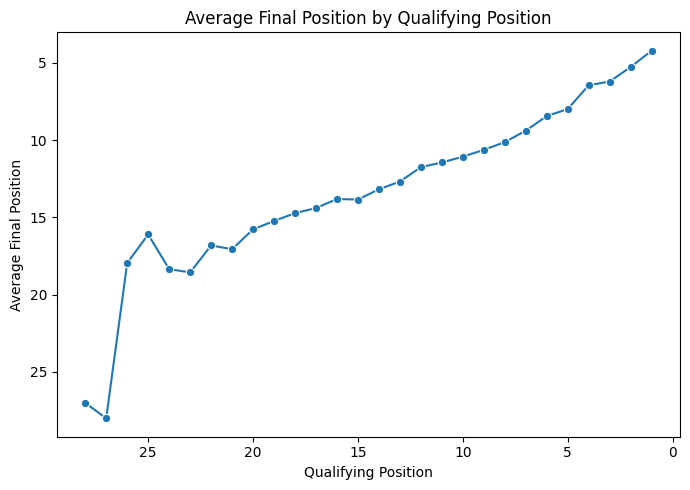

In [100]:
avg_finish = df_quali.groupby('quali_position')['positionOrder'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=avg_finish, x="quali_position", y="positionOrder", marker="o")
plt.title("Average Final Position by Qualifying Position")
plt.xlabel("Qualifying Position")
plt.ylabel("Average Final Position")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

As I can see from the chart - better qualifying position usually leads to better race finish.

### Pit Stops vs Race Finish

now I want to see whether drivers making more pit stops generally finish lower or not

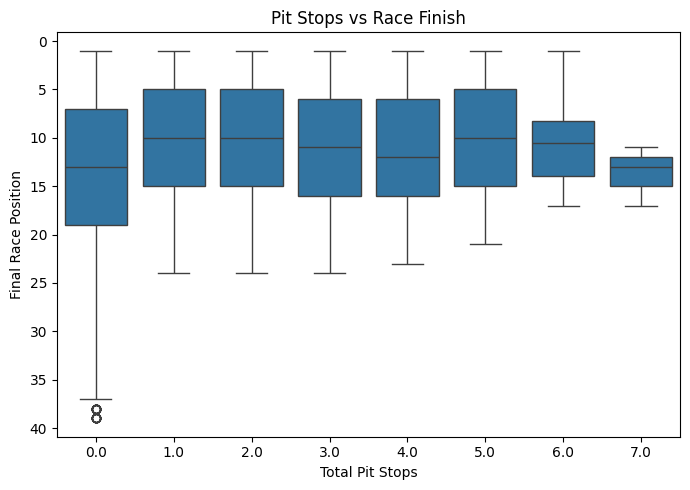

In [101]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='total_pit_stops', y='positionOrder')
plt.title('Pit Stops vs Race Finish')
plt.xlabel('Total Pit Stops')
plt.ylabel('Final Race Position')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

As I can see drivers who make more pit stops usually finish lower in the race, most of winners and top finishers use one or two pit stops.

### Team Dominance Accross Decades

Now I want to see which constructors dominated in different eras

In [102]:
df['decade'] = (df['year'] // 10) * 10

team_trends = (df.groupby(['decade', 'constructor_name'])['points']
               .sum()
               .reset_index()
)

In [103]:
from numpy._core.defchararray import index
top_teams = (team_trends.groupby('constructor_name')['points']
             .sum()
             .nlargest(10)
             .index
)

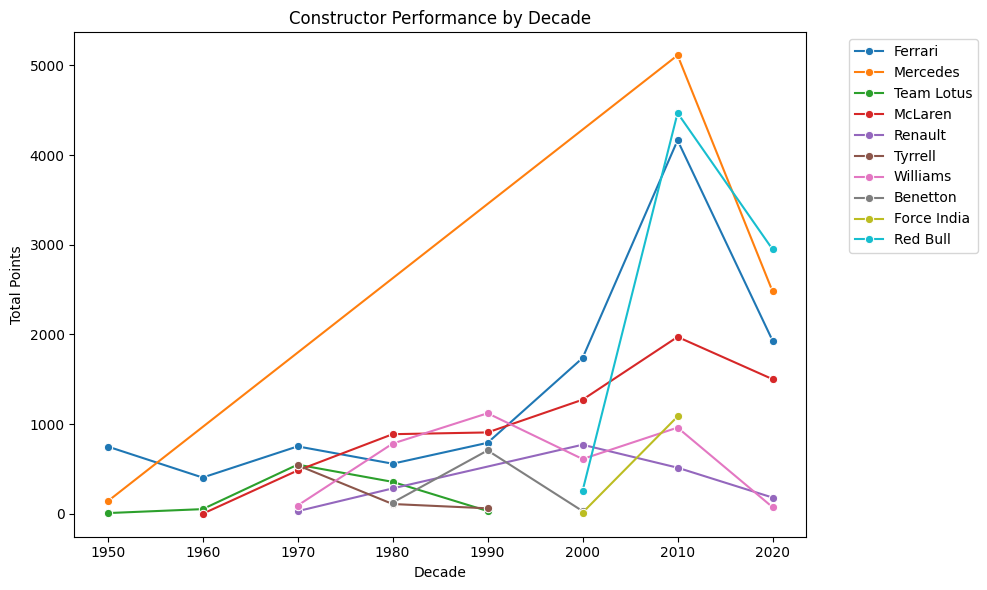

In [104]:
team_trends = team_trends[team_trends['constructor_name'].isin(top_teams)]

plt.figure(figsize=(10,6))
sns.lineplot(data=team_trends, x='decade', y='points', hue='constructor_name', marker='o')
plt.title('Constructor Performance by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

As I can see in this chart: Ferrari has remained consistently strong during the years, while Mercedes dominated during 2010s, followed by Red Bull's rise in the 2020s. Earlier decades were more balanced, but in recent years a few teams clearly dominated in the championship.

### Driver Career Performance

I want to see which drivers have scored the most points over their careers

/tmp/ipython-input-3836543207.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driver_points.values, y=driver_points.index, palette='viridis')


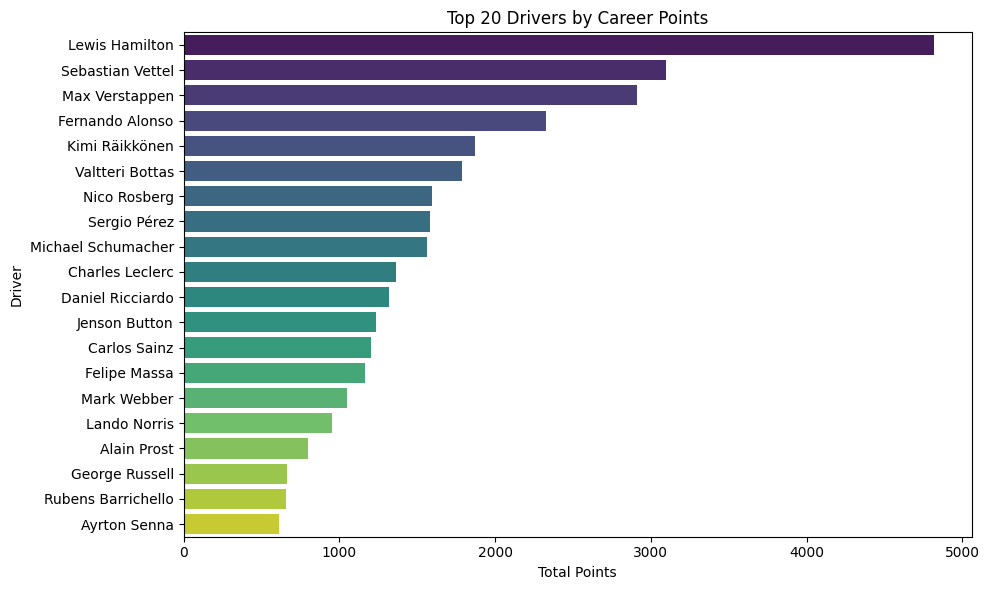

In [105]:
driver_points = (df.groupby(['driver_name'])['points']
                 .sum()
                 .sort_values(ascending=False)
                 .head(20)
)

plt.figure(figsize=(10,6))
sns.barplot(x=driver_points.values, y=driver_points.index, palette='viridis')
plt.title('Top 20 Drivers by Career Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

I can notice that Lewis Hamilton and Sebastian Vettel lead by large margin, showing their dominance. This also reflects how modern drivers tend to collect more points due to longer seasons and updated scoring systems.

### Correlation of Key Variables

Now I want to see how key numeric features relate to each other

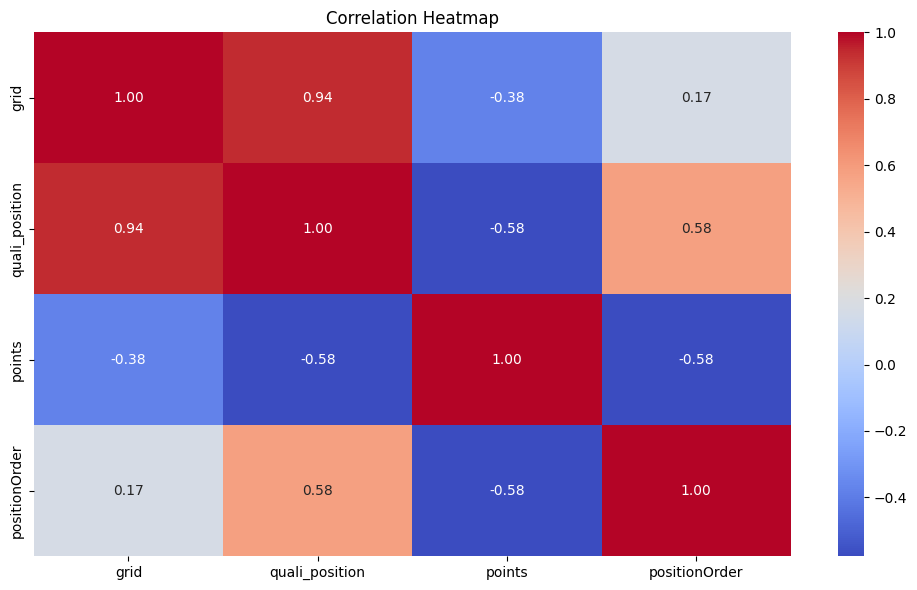

In [106]:
plt.figure(figsize=(10,6))
corr = df[['grid', 'quali_position', 'points', 'positionOrder']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

This heatmap tells me that we have strong relationship between qualifying and grid positions, confirming that both have a major influence on race outcomes.

Qualifying position has a clear negative correlation, which means that starting higher on the grid increases the chance of scoring more points.

Pits stops show only a weak correlation with final results, suggesting that strategy alone cannot overcome starting position advantages.

## Creating Baseline Models

### Importing baseline Models

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression

In [125]:
df_model = merged_base.copy()

### Baseline Classification - Top 10 Finish

#### Creating Target variables

I want to create classification taget - 1 if driver finishes in Top 10
And I also want to create regression target - finishing position

In [126]:
df_model['top10_finish'] = (df_model['positionOrder'] <= 10).astype(int)

print(df_model['top10_finish'].value_counts())

top10_finish
0    15360
1    11308
Name: count, dtype: int64


#### Selecting features, preparing modeling dataset

In [127]:
clf_features = ['grid', 'quali_position', 'sprint_position', 'total_pit_stops', 'mean_pit_duration', 'year']

clf_df = df_model.dropna(subset = clf_features).copy()

In [128]:
X_clf = clf_df[clf_features]
y_clf = clf_df['top10_finish']

In [129]:
clf_df.shape[0]

10494

#### Train test split

In [130]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

print('X_clf_train:', X_clf_train.shape[0])
print('X_clf_test:', X_clf_test.shape[0])

X_clf_train: 8395
X_clf_test: 2099


##### Scaling features

In [131]:
clf_scaler = StandardScaler()
clf_scaler.fit(X_clf_train)

X_clf_train_scaled = clf_scaler.transform(X_clf_train)
X_clf_test_scaled = clf_scaler.transform(X_clf_test)

#### Fit Logistic Regression Model

In [132]:
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_clf_train_scaled, y_clf_train)

LogisticRegression(max_iter=1000)

### Baseline Regression - Finishing position

#### Creating target variables

In [133]:
df_model['finish_position'] = df_model['positionOrder'].astype(float)

df_model['finish_position'].describe()

,finish_position
count,26668.000000
mean,12.778124
std,7.662893
min,1.000000
25%,6.000000
50%,12.000000
75%,18.000000
max,39.000000


#### Selecting features, preparing modeling dataset

In [134]:
reg_features = clf_features

reg_df = df_model.dropna(subset=reg_features).copy()

In [135]:
X_reg = reg_df[reg_features]
y_reg = reg_df['finish_position']

reg_df.shape[0]

10494

#### Train test split

In [136]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print('X_reg_train:', X_reg_train.shape[0])
print('X_reg_test:', X_reg_test.shape[0])

X_reg_train: 8395
X_reg_test: 2099


##### Scaling features

In [137]:
reg_scaler = StandardScaler()
reg_scaler.fit(X_reg_train)

X_reg_train_scaled = reg_scaler.transform(X_reg_train)
X_reg_test_scaled = reg_scaler.transform(X_reg_test)

#### Fit Linear Regression Model

In [138]:
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train_scaled, y_reg_train)

LinearRegression()

## Evaluating Baseline Models

### Importing relevant metrics

In [141]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    mean_absolute_error
)

### Classification Model

#### Prediction and basic metrics

In [142]:
y_clf_pred = log_clf.predict(X_clf_test_scaled)

clf_accuracy = accuracy_score(y_clf_test, y_clf_pred)
clf_precision = precision_score(y_clf_test, y_clf_pred)
clf_recall = recall_score(y_clf_test, y_clf_pred)
clf_f1 = f1_score(y_clf_test, y_clf_pred)

print('Accuracy:', clf_accuracy)
print('Precision:', clf_precision)
print('Recall:', clf_recall)
print('F1 Score:', clf_f1)

Accuracy: 0.7432110528823249
Precision: 0.7269906928645294
Recall: 0.7188139059304703
F1 Score: 0.722879177377892


#### Confusion Matrix

Now I want to understand model's behaviour more clearly with confusion matrix

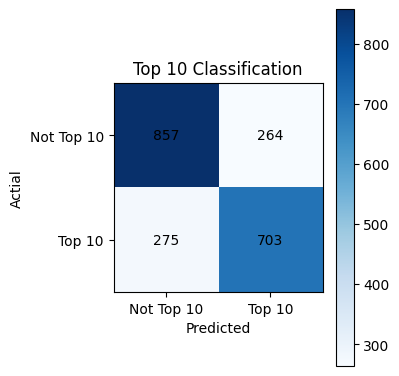

In [143]:
cm = confusion_matrix(y_clf_test, y_clf_pred)

plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Top 10 Classification')
plt.colorbar()
plt.xticks([0, 1], ['Not Top 10', 'Top 10'])
plt.yticks([0, 1], ['Not Top 10', 'Top 10'])
plt.xlabel('Predicted')
plt.ylabel('Actial')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

As I can see the model predicted correctly most of Top 10 and non Top 10 finishers, but there are some mistakes.

### Regression Model

#### Prediction and basic metrics

In [147]:
y_reg_pred = lin_reg.predict(X_reg_test_scaled)

reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_rmse = reg_mse ** 0.5
reg_mae = mean_absolute_error(y_reg_test, y_reg_pred)
reg_r2 = r2_score(y_reg_test, y_reg_pred)

print('RMSE:', reg_rmse)
print('MAE:', reg_mae)
print('R2 Score:', reg_r2)

RMSE: 5.154458137139316
MAE: 4.126700233281484
R2 Score: 0.33223643383868595


The baseline regression model predicts finishing positions with moderate accuracy. With RMSE and MAE we can tell that model is usually a few places away from actual result. With R2 we can say that the model explains about one-third of the variation in finishing positions

#### Residual Plot

Now I want to visualise the model

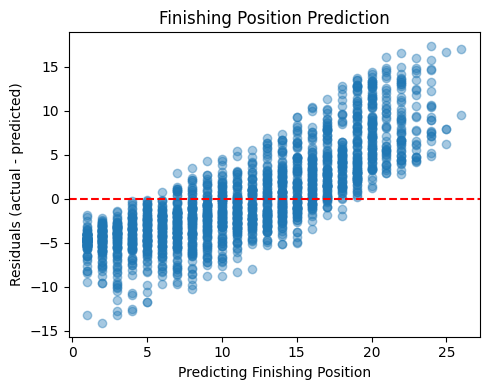

In [148]:
residuals = y_reg_test - y_reg_pred

plt.figure(figsize=(5, 4))
plt.scatter(y_reg_test, residuals, alpha = 0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicting Finishing Position')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Finishing Position Prediction')
plt.tight_layout()
plt.show()

As I can see the model makes both positive and negative errors across the whole range. The model often predicts several positions too high or too low.